In [1]:
import sys
import time
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

In [2]:
ieee30models = pd.read_excel("Raw_Results/RESULTS_IEEE30_MainModelsTest_earlyStop_100Epochs.xlsx")

ieee30models.head()

,Unnamed: 0,Sparsity,Model 1 Accuracy,Model 7 Accuracy,Model 1 F1,Model 7 F1,Model 1 Precision,Model 7 Precision,Model 1 Recall,Model 7 Recall,Model 1 False Positive Rate,Model 7 False Positive Rate
0,0,0.1,0.7090,0.8000,0.589563,0.750000,1.000000,1.000000,0.418,0.600,0.000,0.000
1,1,0.2,0.7625,0.9630,0.688525,0.961578,1.000000,1.000000,0.525,0.926,0.000,0.000
2,2,0.3,0.9050,0.9820,0.896175,0.981670,0.987952,1.000000,0.820,0.964,0.010,0.000
3,3,0.4,0.8900,0.9825,0.876404,0.982188,1.000000,1.000000,0.780,0.965,0.000,0.000
4,4,0.5,0.9770,0.9555,0.976626,0.957355,0.992769,0.919043,0.961,0.999,0.007,0.088


In [3]:
ieee30dct = pd.read_excel("Raw_Results/RESULTS_IEEE30_ClassifiersTest.xlsx", sheet_name = "DCT")
ieee30gnb = pd.read_excel("Raw_Results/RESULTS_IEEE30_ClassifiersTest.xlsx", sheet_name = "GNB")
ieee30knn = pd.read_excel("Raw_Results/RESULTS_IEEE30_ClassifiersTest.xlsx", sheet_name = "KNN")

In [4]:
sparsity = ieee30models['Sparsity']
model1_accuracy = ieee30models['Model 1 Accuracy']
model7_accuracy = ieee30models['Model 7 Accuracy']
model1_f1 = ieee30models['Model 1 F1']
model7_f1 = ieee30models['Model 7 F1']
model1_precision = ieee30models['Model 1 Precision']
model7_precision = ieee30models['Model 7 Precision']
model1_recall = ieee30models['Model 1 Recall']
model1_recall = ieee30models['Model 7 Recall']

In [5]:
dct_accuracy = ieee30dct['Accuracy']
dct_f1 = ieee30dct['F1 score']
dct_precision = ieee30dct['Precision']
dct_recall = ieee30dct['Recall']

gnb_accuracy = ieee30gnb['Accuracy']
gnb_f1 = ieee30gnb['F1 score']
gnb_precision = ieee30gnb['Precision']
gnb_recall = ieee30gnb['Recall']

knn_accuracy = ieee30knn['Accuracy']
knn_f1 = ieee30knn['F1 score']
knn_precision = ieee30knn['Precision']
knn_recall = ieee30knn['Recall']

In [18]:
SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 42

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'36', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
title_font2 = {'fontname':'Arial', 'size':'30', 'color':'black', 'weight':'medium',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

## Accuracy Plot

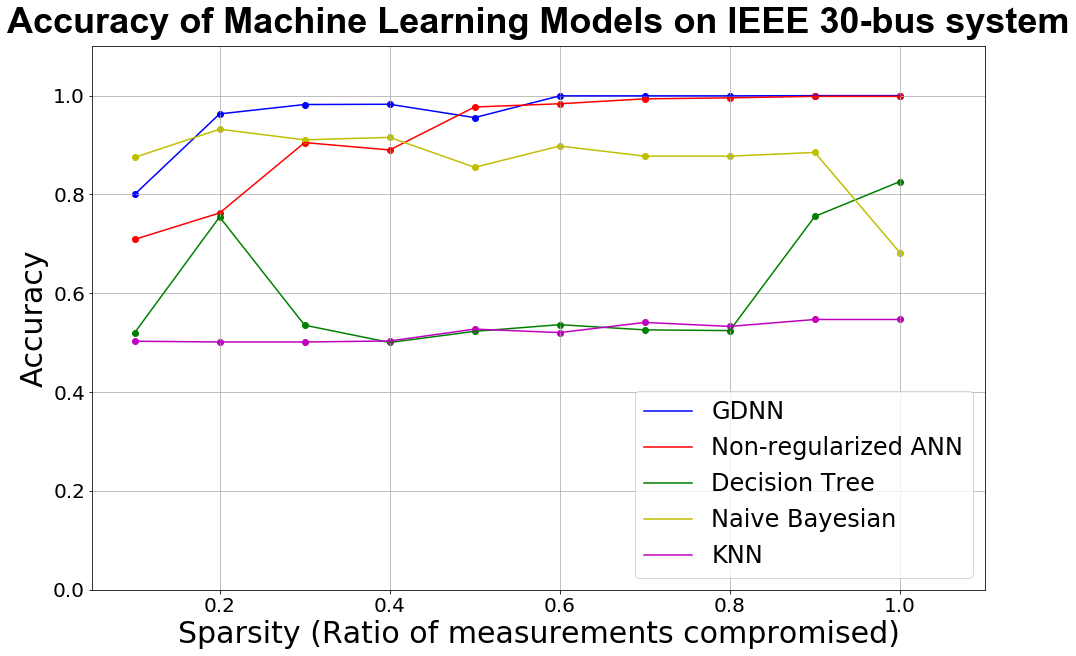

In [19]:
plt.figure(figsize=(16,10))
plt.scatter(sparsity,model7_accuracy, color = 'b')
plt.plot(sparsity,model7_accuracy, 'b-', label="GDNN")

plt.scatter(sparsity,model1_accuracy, color = 'r')
plt.plot(sparsity,model1_accuracy, 'r-', label="Non-regularized ANN")

plt.scatter(sparsity,dct_accuracy, color = 'g')
plt.plot(sparsity,dct_accuracy, 'g-', label="Decision Tree")

plt.scatter(sparsity,gnb_accuracy, color = 'y')
plt.plot(sparsity,gnb_accuracy, 'y-', label="Naive Bayesian")

plt.scatter(sparsity,knn_accuracy, color = 'm')
plt.plot(sparsity,knn_accuracy, 'm-', label="KNN")
plt.ylabel('Accuracy')
plt.xlabel('Sparsity (Ratio of measurements compromised)')
plt.legend(loc="lower right")
plt.title('Accuracy of Machine Learning Models on IEEE 30-bus system', **title_font)
plt.axis([0.05,1.1,0,1.1])
plt.grid()

plt.savefig('IEEE30_accuracies.png')
plt.show()

## F1 Score Plot

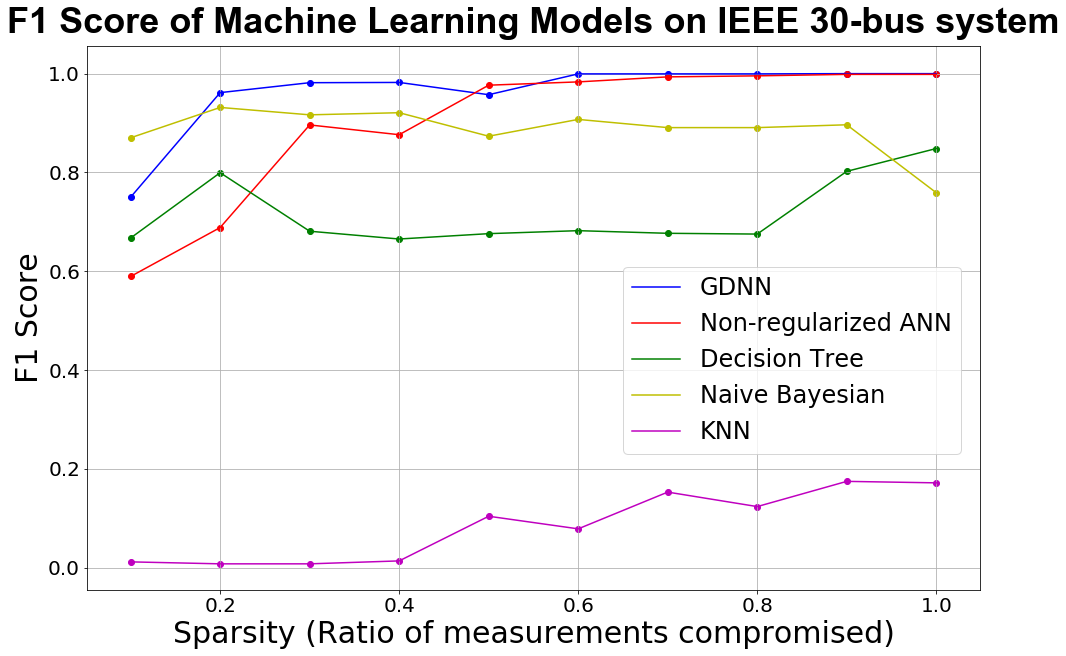

In [23]:
plt.figure(figsize=(16,10))
plt.scatter(sparsity,model7_f1, color = 'b')
plt.plot(sparsity,model7_f1, 'b-', label="GDNN")

plt.scatter(sparsity,model1_f1, color = 'r')
plt.plot(sparsity,model1_f1, 'r-', label="Non-regularized ANN")

plt.scatter(sparsity,dct_f1, color = 'g')
plt.plot(sparsity,dct_f1, 'g-', label="Decision Tree")

plt.scatter(sparsity,gnb_f1, color = 'y')
plt.plot(sparsity,gnb_f1, 'y-', label="Naive Bayesian")

plt.scatter(sparsity,knn_f1, color = 'm')
plt.plot(sparsity,knn_f1, 'm-', label="KNN")
plt.ylabel('F1 Score')
plt.xlabel('Sparsity (Ratio of measurements compromised)')
plt.legend(loc=[0.6,0.25])
plt.title('F1 Score of Machine Learning Models on IEEE 30-bus system', **title_font)
plt.grid()

plt.savefig('IEEE30_F1.png')
plt.show()

## Average Results

In [9]:
DGNN_acc = np.mean(model7_accuracy)
DGNN_f1 = np.mean(model7_f1)
ANN_acc = np.mean(model1_accuracy)
ANN_f1 = np.mean(model1_f1)

DCT_acc = np.mean(dct_accuracy)
DCT_f1 = np.mean(dct_f1)
GNB_acc = np.mean(gnb_accuracy)
GNB_f1 = np.mean(gnb_f1)
KNN_acc = np.mean(knn_accuracy)
KNN_f1 = np.mean(knn_f1)

In [10]:
print("DCT accuracy = {}, f1 = {}".format(DCT_acc,DCT_f1))
print("GNB accuracy = {}, f1 = {}".format(GNB_acc,GNB_f1))
print("KNN accuracy = {}, f1 = {}".format(KNN_acc,KNN_f1))

print("ANN accuracy = {}, f1 = {}".format(ANN_acc,ANN_f1))
print("DGNN accuracy = {}, f1 = {}".format(DGNN_acc,DGNN_f1))

DCT accuracy = 0.6002, f1 = 0.717456385889487
GNB accuracy = 0.8708499999999999, f1 = 0.8857096765999934
KNN accuracy = 0.52255, f1 = 0.0848461071136832
ANN accuracy = 0.9212999939918518, f1 = 0.8996550153309192
DGNN accuracy = 0.968149995803833, f1 = 0.9631291561823885
